# Prediction Of Employee Attrition using Python

Here, we can predict who, and when an employee will terminate the service. Employee churn is expensive, and incremental improvements will give significant results. It will help us in designing better retention plans and improving employee satisfaction.

In Research, it was found that employee attrition will be affected by age, tenure, pay, job satisfaction, salary, working conditions, growth potential and employee’s perceptions of fairness. Some other variables such as age, gender, ethnicity, education, and marital status, were essential factors in the prediction of employee attririon. In some cases such as the employee with niche skills are harder to replace. It affects the ongoing work and productivity of existing employees. Acquiring new employees as a replacement has its costs such as hiring costs and training costs. Also, the new employee will take time to learn skills at the similar level of technical or business expertise knowledge of an older employee. To tackle this problem we are going to apply machine learning techniques to predict employee attrition, which will help in taking necessary actions.

## Exploratory Data Analysis and Visualization

In [73]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data = pd.read_csv('C:\Coding\Projects\HR_comma_sep.csv')
print(data.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3   

In [75]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [76]:
empl_left = data.groupby('left')
print(empl_left.mean())

      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


In [77]:
print(data.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

## No. of employees left

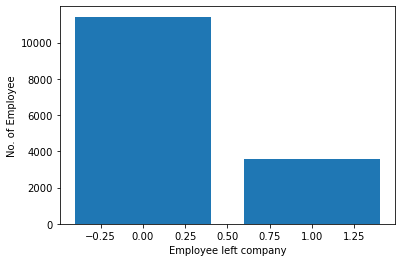

In [78]:
empl_left_count = data.groupby('left').count()
#print(empl_left_count)
plt.bar(empl_left_count.index.values, empl_left_count['satisfaction_level'])
plt.xlabel('Employee left company')
plt.ylabel('No. of Employee')
plt.show()

In [79]:
print(data.value_counts('left'))

left
0    11428
1     3571
dtype: int64


**0 -> Stayed; 1 -> Left**
* Here, we can see that out of 15,000 employees approx 3,571 were left, and 11,428 stayed. The no of employee left is 23 % of the total employment.

## Subplots using Seaborn for the analysis between different features

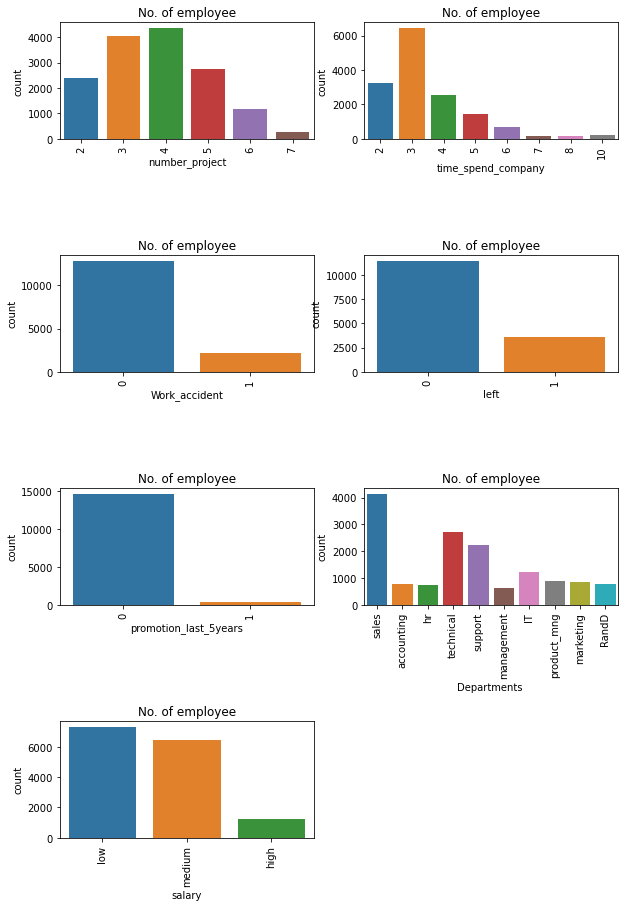

In [80]:
features = ['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig = plt.subplots(figsize = (10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x = j,data = data)
    plt.xticks(rotation = 90)
    plt.title("No. of employee")

We can observe the following points in the above visualization:

* Most of the employee are doing 3-5 projects.
* Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.
* The no of employee left is 23 % of the total employment.
* A decidedly less number of employee get the promotion in the last 5 year.
* The sales department is having maximum no.of employee followed by technical and support
* Most of the employees are getting salary either medium or low.

## Data Analysis and Visualization for Stayed(0) vs Left(1)

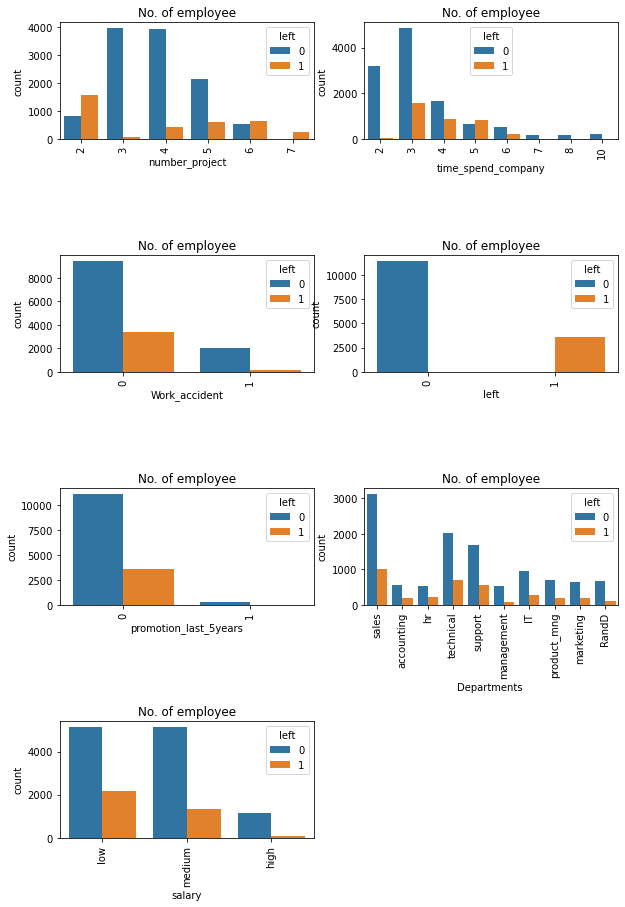

In [81]:
fig = plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x = j,data = data, hue='left')
    plt.xticks(rotation = 90)
    plt.title("No. of employee")

We can observe the following points in the above visualization:

* Those employees who have the number of projects more than 5 left the company due to overload of work.
* The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.
* Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.

## Data Analysis and Visualization Summary:

Following features are most influencing a person to leave the company:

* **Promotions:** Employees are far more likely to quit their job if they haven't received a promotion in the last 5 years.
* **Time with Company:** Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.
* **Number Of Projects:** Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.
* **Salary:** Most of the employees that quit among the mid or low salary groups.

## Cluster Analysis:

Let's find out the groups of employees who left. We can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So we can bunch them in the group of people using cluster analysis.

In [82]:
#import module
from sklearn.cluster import KMeans

#filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]

#create groups using K-means clustering
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

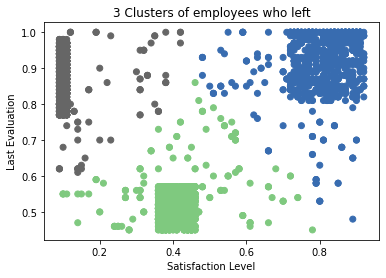

In [83]:
#Add new column 'label' and assign cluster labels.
left_emp['label'] = kmeans.labels_

#Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c = left_emp['label'],cmap = 'Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

Here, Employee who left the company can be grouped into 3 type of employees:

* High Satisfaction and High Evaluation(Shaded by green color in the graph), we can also call them Winners.
* Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), we can also call them Frustrated.
* Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), we can also call them 'Bad match'.

## Building a Prediction Model

**Pre-Processing Data**

In [84]:
#import LabelEncoder
from sklearn import preprocessing

#Creating label encoder
le = preprocessing.LabelEncoder()

#Converting string labels into numbers
data['salary'] = le.fit_transform(data['salary'])
data['Departments '] = le.fit_transform(data['Departments '])

**Split Train and Test Set**

In [85]:
#spliting data into features
x = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Departments ', 'salary']]
y = data['left']

In [86]:
#import train_test_split function
from sklearn.model_selection import train_test_split

#split datasets into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) #70% training and 30% test

**Model Building**

In [87]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(x_test)

## Evaluating Model Performance

In [88]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806


## Conclusion

* We got a classification rate of 97%, considered as good accuracy.

* Precision: In my prediction case, when Gradient Boosting model predicted an employee is going to leave, that employee actually left 95% of the time.

* Recall: If there is an employee who left present in the test set then my Gradient Boosting model can identify it 92% of the time.